**Image Zoning**

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import collections
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def cos_similarity(v1,v2):
    return np.dot(v1,v2)/np.dot(np.linalg.norm(v1),np.linalg.norm(v2))

In [3]:
digits = load_digits()
print([i for i in range(len(digits["target"])) if digits["target"][i]==2])

[2, 12, 22, 50, 51, 54, 57, 75, 77, 84, 113, 115, 116, 132, 142, 152, 180, 181, 184, 187, 205, 207, 214, 241, 243, 244, 258, 268, 278, 306, 307, 310, 313, 331, 333, 340, 369, 371, 372, 388, 398, 408, 436, 437, 440, 443, 461, 463, 470, 499, 501, 502, 518, 528, 538, 566, 567, 570, 573, 591, 593, 600, 629, 631, 632, 648, 658, 668, 696, 697, 700, 703, 721, 723, 730, 759, 761, 762, 778, 788, 798, 826, 827, 830, 833, 851, 853, 860, 889, 891, 892, 907, 917, 927, 953, 956, 959, 977, 979, 986, 1014, 1016, 1017, 1031, 1041, 1051, 1081, 1084, 1102, 1104, 1111, 1140, 1142, 1143, 1159, 1169, 1179, 1207, 1208, 1211, 1214, 1232, 1234, 1241, 1270, 1272, 1273, 1289, 1299, 1309, 1337, 1338, 1341, 1344, 1362, 1364, 1371, 1400, 1402, 1403, 1417, 1427, 1437, 1465, 1466, 1469, 1472, 1490, 1492, 1499, 1528, 1530, 1531, 1547, 1557, 1565, 1593, 1594, 1597, 1600, 1618, 1625, 1654, 1655, 1669, 1679, 1689, 1717, 1718, 1721, 1724, 1742, 1744, 1751, 1780, 1782, 1783]


In [4]:
digits["images"][3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

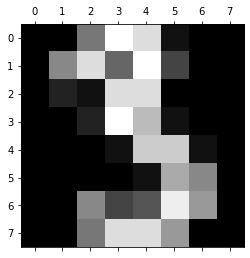

In [5]:
plt.gray()
plt.matshow(digits.images[3])
plt.show()

In [13]:
def dark_zone_Vector(array):
    vec=[]
    cnt=0
    cnt1=0
    for row in range(4):
        for col in range(4):
            if array[row][col]<=3:
                cnt+=1
        for col in range(4,8):
            if array[row][col]<=3:
                cnt+=1
    vec.append(cnt)
    cnt=0
    for row in range(8):
        for col in range(2,6):
            if array[row][col]<=3:
                cnt+=1    
    vec.append(cnt)

    return np.array(vec)

    #Splits into 4 zones and counts dark pixels for each zone.

In [14]:
print(zone_Vector(digits["images"][0]))
print(zone_Vector(digits["images"][1]))
print(cos_similarity(zone_Vector(digits["images"][2]),zone_Vector(digits["images"][22])))

[13 10 11]
[15  9 16]
0.9907485390871893


In [15]:
train_vectors, test_vectors,train_labels, test_labels = train_test_split(digits["images"],digits["target"], test_size=0.8, random_state=50)

In [22]:
def zone_vectors_for_classification(traning_set,training_class_labels):
    d={}
    cnt=collections.Counter(training_class_labels)
    for i in range(len(traning_set)):
        if training_class_labels[i] not in d:
            d[training_class_labels[i]]=zone_Vector(traning_set[i])
        else:
            d[training_class_labels[i]]+=zone_Vector(traning_set[i])
    for key in d:
        d[key]=d[key]/cnt[key]
    return d
def predict(zone_vec_classifer,image):
    max1=-1
    classification=-10000
    image=zone_Vector(image)
    for key in zone_vec_classifer:
        if cos_similarity(image,zone_vec_classifer[key])>max1:
            max1=cos_similarity(image,zone_vec_classifer[key])
            classification=key
    return classification
    

In [23]:
zone_vecs_classifiers=zone_vectors_for_classification(train_vectors,train_labels)
zone_vecs_classifiers

{7: array([15.44444444,  9.33333333, 13.41666667]),
 0: array([13.09677419,  9.16129032, 12.4516129 ]),
 1: array([15.41025641,  9.48717949, 14.56410256]),
 9: array([15.07894737,  8.92105263, 12.28947368]),
 4: array([13.73529412,  9.64705882, 14.08823529]),
 8: array([15.        ,  5.60606061, 14.6969697 ]),
 2: array([14.56410256,  8.84615385, 14.28205128]),
 3: array([15.05 ,  8.225, 14.175]),
 5: array([13.48648649,  8.83783784, 14.48648649]),
 6: array([14.90625,  9.5625 , 12.96875])}

In [24]:
predict_vectors = test_vectors
true_labels = test_labels

pred_labels = [predict(zone_vecs_classifiers,image) for image in test_vectors]

print(pred_labels)
print(true_labels)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(10)))

[5, 8, 6, 6, 2, 6, 3, 0, 9, 0, 8, 6, 9, 2, 9, 7, 4, 3, 4, 3, 6, 0, 8, 0, 0, 0, 9, 5, 3, 6, 8, 4, 7, 5, 4, 5, 8, 9, 1, 8, 0, 0, 0, 3, 4, 2, 8, 3, 9, 4, 9, 3, 9, 5, 8, 9, 4, 5, 8, 4, 8, 7, 1, 4, 4, 8, 4, 8, 9, 5, 9, 6, 4, 4, 3, 3, 5, 8, 4, 9, 4, 9, 9, 3, 0, 8, 3, 8, 4, 4, 8, 8, 8, 8, 0, 4, 8, 6, 8, 3, 0, 4, 0, 4, 5, 0, 2, 6, 8, 4, 8, 4, 9, 5, 3, 4, 9, 3, 0, 8, 4, 4, 5, 9, 9, 9, 0, 8, 3, 9, 3, 3, 8, 0, 7, 2, 5, 0, 2, 3, 8, 4, 6, 0, 2, 9, 6, 0, 4, 8, 3, 4, 9, 8, 0, 8, 5, 9, 0, 5, 0, 6, 3, 7, 8, 9, 9, 3, 3, 4, 5, 9, 7, 2, 9, 9, 6, 2, 6, 4, 7, 5, 5, 9, 8, 0, 0, 5, 0, 3, 4, 8, 8, 0, 2, 8, 6, 9, 6, 3, 3, 9, 4, 8, 4, 4, 8, 2, 9, 0, 3, 1, 7, 3, 2, 5, 4, 3, 3, 8, 7, 4, 8, 8, 3, 5, 9, 2, 5, 3, 5, 3, 8, 5, 8, 8, 4, 0, 2, 9, 0, 7, 3, 8, 7, 9, 6, 3, 8, 9, 0, 2, 6, 4, 8, 4, 4, 9, 6, 3, 3, 0, 9, 8, 5, 3, 8, 4, 3, 1, 9, 9, 4, 3, 8, 9, 0, 3, 9, 4, 4, 7, 4, 3, 5, 6, 6, 8, 5, 9, 1, 8, 9, 9, 1, 0, 1, 6, 8, 5, 0, 8, 4, 8, 0, 4, 4, 5, 8, 3, 5, 8, 5, 0, 5, 9, 4, 4, 5, 3, 0, 3, 4, 5, 9, 3, 3, 4, 0, 8, 8, 2, 5, 